In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision import datasets, transforms

In [2]:
# Hyper parameters
EPOCH = 10
BATCH_SIZE = 64
LR_G = 0.0001
LR_D = 0.0001

In [3]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)
# device = 'cpu'

transform = transforms.ToTensor()
data_train = datasets.MNIST(root="./mnist",
                            transform=transform,
                            train=True,
                            download=True)
data_loader = torch.utils.data.DataLoader(dataset=data_train, batch_size=BATCH_SIZE, shuffle=True)

GPU State: cpu


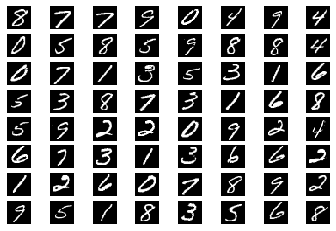

In [4]:
def showImg(imgs):
    sqrtn = int(np.ceil(np.sqrt(imgs.shape[0])))
    for index, img in enumerate(imgs):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(img.reshape(28, 28), 'gray')
        plt.axis(False)
    plt.show()
showImg(data_loader.dataset.data[-64:])

In [13]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(100+10, 256),    # 100+10
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )
        
        self.label_emb = nn.Embedding(10, 10)

    def forward(self, z, label):
        label = self.label_emb(label)
        y = torch.cat((z, label), -1)
        return self.model(y)

In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784+10, 512),     #784+10
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
        self.label_emb = nn.Embedding(10, 10)

    def forward(self, y, label):
        label = self.label_emb(label)
        x = torch.cat([y, label], 1)
        return self.model(x)

In [18]:
D = Discriminator().to(device)
G = Generator().to(device)
loss_f = nn.MSELoss().to(device)
D_optim = torch.optim.Adam(D.parameters(), lr=LR_D)
G_optim = torch.optim.Adam(G.parameters(), lr=LR_G)
print(G)
print(D)

Generator(
  (model): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
  (label_emb): Embedding(10, 10)
)
Discriminator(
  (model): Sequential(
    (0): Linear(in_features=794, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (label_emb): Embedding(10, 10)
)


In [16]:
print(fake_img.size())
print(fake_label.size())

print(real_img.size())
print(real_label.size())
print(ones.size())
print(D_fake.size())

torch.Size([32, 784])
torch.Size([32])
torch.Size([32, 784])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32, 794])
torch.Size([32, 1])


start epoch 0...
0/10, 0/938, D_loss: 0.249  G_loss: 0.245
0/10, 100/938, D_loss: 0.071  G_loss: 0.520
0/10, 200/938, D_loss: 0.052  G_loss: 0.687
0/10, 300/938, D_loss: 0.199  G_loss: 0.362
0/10, 400/938, D_loss: 0.209  G_loss: 0.381
0/10, 500/938, D_loss: 0.066  G_loss: 0.530
0/10, 600/938, D_loss: 0.137  G_loss: 0.417
0/10, 700/938, D_loss: 0.058  G_loss: 0.560
0/10, 800/938, D_loss: 0.064  G_loss: 0.564
0/10, 900/938, D_loss: 0.041  G_loss: 0.713


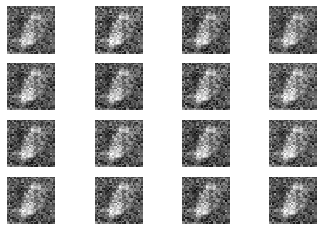

start epoch 1...
1/10, 0/938, D_loss: 0.016  G_loss: 0.750
1/10, 100/938, D_loss: 0.055  G_loss: 0.711
1/10, 200/938, D_loss: 0.007  G_loss: 0.885
1/10, 300/938, D_loss: 0.019  G_loss: 0.834
1/10, 400/938, D_loss: 0.011  G_loss: 0.844
1/10, 500/938, D_loss: 0.016  G_loss: 0.922
1/10, 600/938, D_loss: 0.021  G_loss: 0.772
1/10, 700/938, D_loss: 0.017  G_loss: 0.876
1/10, 800/938, D_loss: 0.020  G_loss: 0.776
1/10, 900/938, D_loss: 0.006  G_loss: 0.841


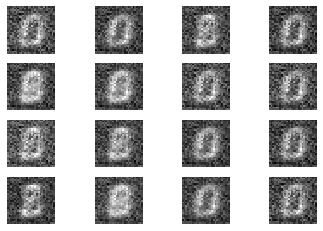

start epoch 2...
2/10, 0/938, D_loss: 0.019  G_loss: 0.818
2/10, 100/938, D_loss: 0.011  G_loss: 0.864
2/10, 200/938, D_loss: 0.034  G_loss: 0.786
2/10, 300/938, D_loss: 0.019  G_loss: 0.812
2/10, 400/938, D_loss: 0.015  G_loss: 0.872
2/10, 500/938, D_loss: 0.023  G_loss: 0.816
2/10, 600/938, D_loss: 0.026  G_loss: 0.726
2/10, 700/938, D_loss: 0.014  G_loss: 0.853
2/10, 800/938, D_loss: 0.003  G_loss: 0.907
2/10, 900/938, D_loss: 0.029  G_loss: 0.802


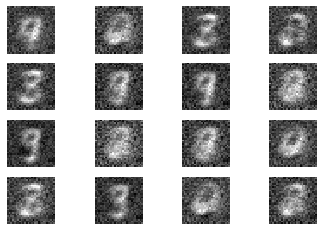

start epoch 3...
3/10, 0/938, D_loss: 0.016  G_loss: 0.901
3/10, 100/938, D_loss: 0.011  G_loss: 0.815
3/10, 200/938, D_loss: 0.007  G_loss: 0.938
3/10, 300/938, D_loss: 0.033  G_loss: 0.918
3/10, 400/938, D_loss: 0.018  G_loss: 0.897
3/10, 500/938, D_loss: 0.046  G_loss: 0.908
3/10, 600/938, D_loss: 0.007  G_loss: 0.925
3/10, 700/938, D_loss: 0.010  G_loss: 0.869
3/10, 800/938, D_loss: 0.006  G_loss: 0.878
3/10, 900/938, D_loss: 0.007  G_loss: 0.878


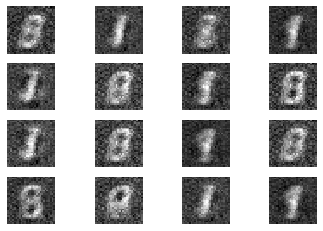

start epoch 4...
4/10, 0/938, D_loss: 0.007  G_loss: 0.884
4/10, 100/938, D_loss: 0.006  G_loss: 0.926
4/10, 200/938, D_loss: 0.002  G_loss: 0.939
4/10, 300/938, D_loss: 0.009  G_loss: 0.960
4/10, 400/938, D_loss: 0.022  G_loss: 0.854
4/10, 500/938, D_loss: 0.011  G_loss: 0.925
4/10, 600/938, D_loss: 0.007  G_loss: 0.876
4/10, 700/938, D_loss: 0.014  G_loss: 0.851
4/10, 800/938, D_loss: 0.005  G_loss: 0.909
4/10, 900/938, D_loss: 0.013  G_loss: 0.878


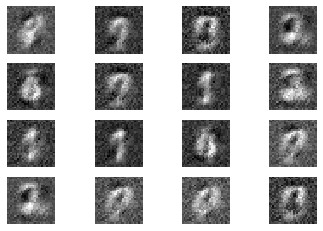

start epoch 5...
5/10, 0/938, D_loss: 0.017  G_loss: 0.889
5/10, 100/938, D_loss: 0.015  G_loss: 0.887
5/10, 200/938, D_loss: 0.009  G_loss: 0.936
5/10, 300/938, D_loss: 0.015  G_loss: 0.939
5/10, 400/938, D_loss: 0.009  G_loss: 0.902
5/10, 500/938, D_loss: 0.007  G_loss: 0.909
5/10, 600/938, D_loss: 0.012  G_loss: 0.880
5/10, 700/938, D_loss: 0.009  G_loss: 0.931
5/10, 800/938, D_loss: 0.013  G_loss: 0.911
5/10, 900/938, D_loss: 0.017  G_loss: 0.845


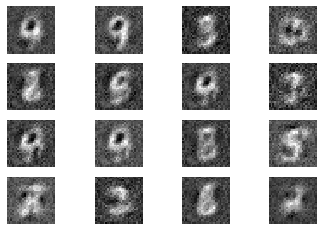

start epoch 6...
6/10, 0/938, D_loss: 0.005  G_loss: 0.910
6/10, 100/938, D_loss: 0.013  G_loss: 0.967
6/10, 200/938, D_loss: 0.024  G_loss: 0.867
6/10, 300/938, D_loss: 0.021  G_loss: 0.848
6/10, 400/938, D_loss: 0.012  G_loss: 0.891
6/10, 500/938, D_loss: 0.016  G_loss: 0.900
6/10, 600/938, D_loss: 0.013  G_loss: 0.892
6/10, 700/938, D_loss: 0.013  G_loss: 0.914
6/10, 800/938, D_loss: 0.007  G_loss: 0.937
6/10, 900/938, D_loss: 0.013  G_loss: 0.925


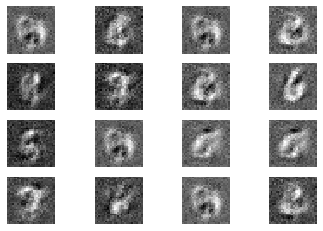

start epoch 7...
7/10, 0/938, D_loss: 0.014  G_loss: 0.957
7/10, 100/938, D_loss: 0.016  G_loss: 0.923
7/10, 200/938, D_loss: 0.006  G_loss: 0.942
7/10, 300/938, D_loss: 0.013  G_loss: 0.937
7/10, 400/938, D_loss: 0.019  G_loss: 0.829
7/10, 500/938, D_loss: 0.012  G_loss: 0.892
7/10, 600/938, D_loss: 0.015  G_loss: 0.967
7/10, 700/938, D_loss: 0.002  G_loss: 0.947
7/10, 800/938, D_loss: 0.004  G_loss: 0.918
7/10, 900/938, D_loss: 0.013  G_loss: 0.919


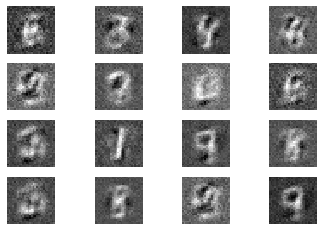

start epoch 8...
8/10, 0/938, D_loss: 0.004  G_loss: 0.945
8/10, 100/938, D_loss: 0.015  G_loss: 0.896
8/10, 200/938, D_loss: 0.018  G_loss: 0.929
8/10, 300/938, D_loss: 0.010  G_loss: 0.949
8/10, 400/938, D_loss: 0.003  G_loss: 0.970
8/10, 500/938, D_loss: 0.016  G_loss: 0.931
8/10, 600/938, D_loss: 0.029  G_loss: 0.858
8/10, 700/938, D_loss: 0.020  G_loss: 0.931
8/10, 800/938, D_loss: 0.005  G_loss: 0.921
8/10, 900/938, D_loss: 0.014  G_loss: 0.890


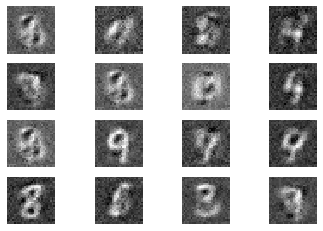

start epoch 9...
9/10, 0/938, D_loss: 0.021  G_loss: 0.983
9/10, 100/938, D_loss: 0.015  G_loss: 0.962
9/10, 200/938, D_loss: 0.022  G_loss: 0.899
9/10, 300/938, D_loss: 0.027  G_loss: 0.882
9/10, 400/938, D_loss: 0.013  G_loss: 0.915
9/10, 500/938, D_loss: 0.019  G_loss: 0.930
9/10, 600/938, D_loss: 0.006  G_loss: 0.932
9/10, 700/938, D_loss: 0.015  G_loss: 0.922
9/10, 800/938, D_loss: 0.025  G_loss: 0.940
9/10, 900/938, D_loss: 0.013  G_loss: 0.940


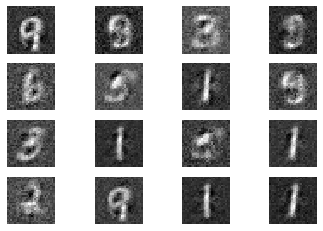

Done!!!


In [20]:
for epoch in range(EPOCH):
    print('start epoch {}...'.format(epoch))
    for i, (img, label) in enumerate(data_loader):
        
        batch_size =img.shape[0]
        
        z = torch.FloatTensor(torch.randn(batch_size, 100))
        
#         real_label = label.view(label.size(0), 0)
        real_label = torch.LongTensor(label)
        
        fake_label = torch.LongTensor(torch.randint(0, 10, (batch_size,)))

#         fake_label = label.view(label.size(0), -1)
        
        real_img = img.view(batch_size, -1)
        fake_img = G(z, fake_label)
        
        ones = torch.ones(batch_size, 1)
        zeros = torch.zeros(batch_size, 1)
        
        D_real = D(real_img, real_label)
        D_fake = D(fake_img, fake_label)

#         D_input = torch.cat((prob_real, prob_fake), 0)
#         D_target = torch.cat((real_label, fake_label), 0)

        D_loss_real = loss_f(D_real, ones)      
        D_loss_fake = loss_f(D_fake, zeros)
        D_loss = (D_loss_real + D_loss_fake) / 2
        G_loss = loss_f(D_fake, ones)

        D_optim.zero_grad()
        D_loss.backward(retain_graph=True)      # reusing computational graph
        D_optim.step()

        G_optim.zero_grad()
        G_loss.backward()
        G_optim.step()
        
        if i % 100 == 0 or i == len(data_loader):
            print('{}/{}, {}/{}, D_loss: {:.3f}  G_loss: {:.3f}'.format(epoch, EPOCH, i, len(data_loader), D_loss.item(), G_loss.item()))
            
    imgs_numpy = (fake_img.data.cpu().numpy()+1.0)/2.0
    showImg(imgs_numpy[:16])
    plt.show()
print('Done!!!')

In [ ]:
x = Variable(torch.FloatTensor(np.random.normal(0, 1, (64, 100))))
valid = Variable(torch.FloatTensor(64, 1).fill_(1.0), requires_grad=False)
fake = Variable(torch.FloatTensor(64, 1).fill_(0.0), requires_grad=False)
print(zeros)

In [ ]:
for i,(img,label) in enumerate(data_loader):
    print(img.size())
    print(label.size())
    